In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

In [3]:
t_start = 30
t_end = 215

In [4]:
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/aggregate_1/U_matrix", "r") as file:
    U = file["matrix"][t_start:t_end]

with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/aggregate_1/V_matrix", "r") as file:
    V = file["matrix"][t_start:t_end]

with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/aggregate_1/M_matrix", "r") as file:
    M = file["matrix"][t_start:t_end]
    
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/aggregate_1/xgrid_matrix", "r") as file:
    xgrid = file["matrix"][t_start:t_end]
    
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/aggregate_1/ygrid_matrix", "r") as file:
    ygrid = file["matrix"][t_start:t_end]

In [5]:
np.shape(U)

(185, 49, 49)

In [6]:
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/headon_video1_layer4.h5", "r") as file:
    slices = file["data"][t_start:t_end]

# Visualization of original PIV results

ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
ha
h

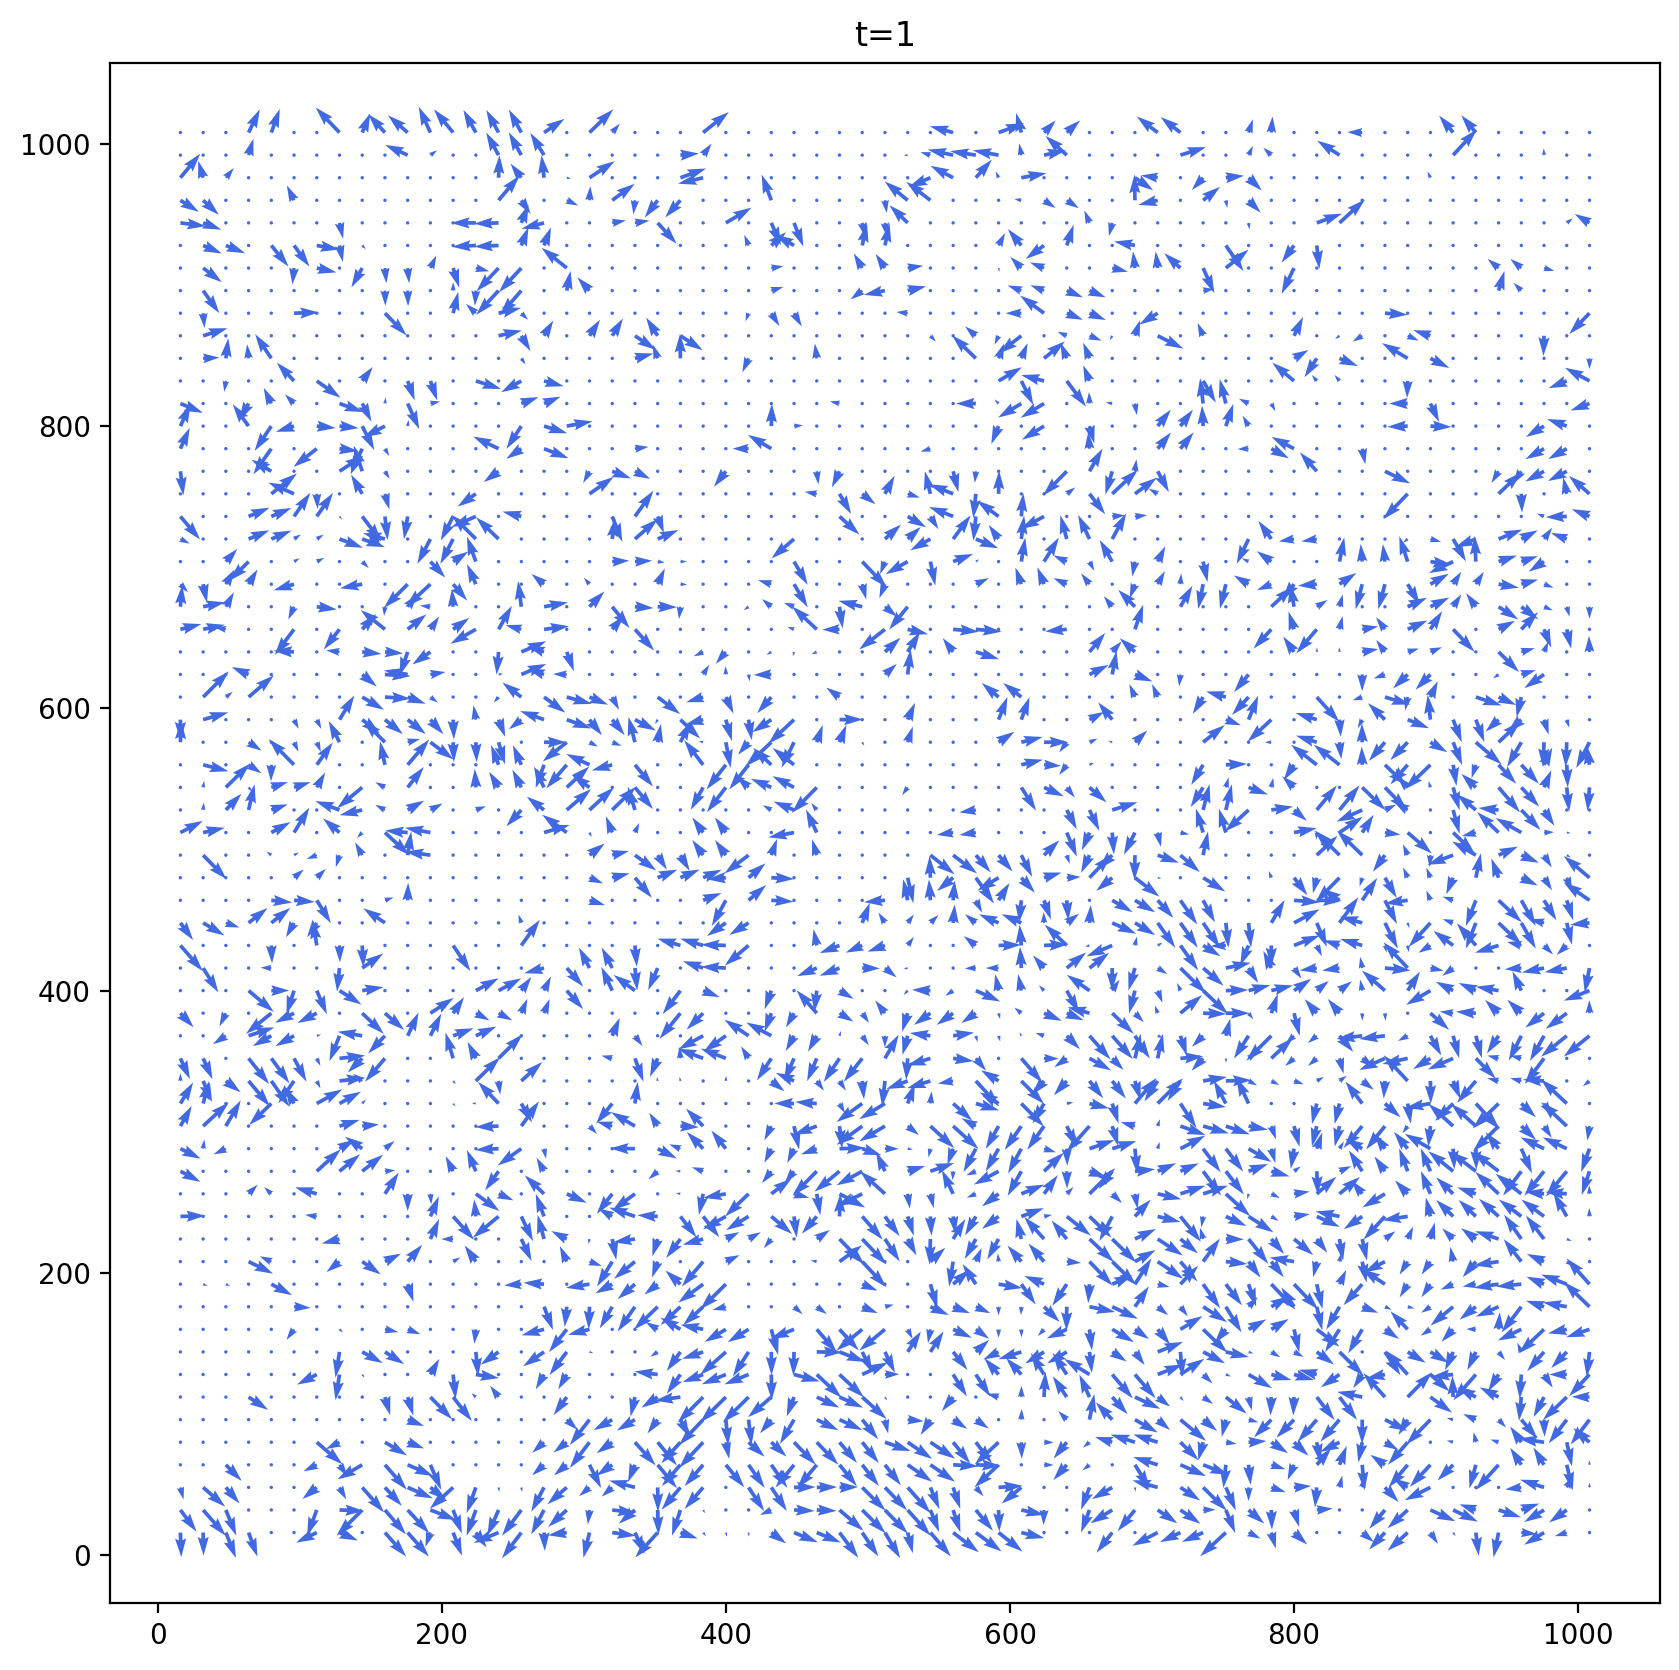

In [4]:
fig = plt.figure(figsize = (10, 10), dpi=200)
x = xgrid[0]
y = ygrid[0]

def make_frame(i):
    plt.clf()
    # Plotting.
    plt.title("t="+str(i+t_start))
    #plt.imshow(slices[i].T)
    plt.quiver(x, y, V[i], -U[i], color = "royalblue") # If nescessary use scale to rescale the arrow representation.
    plt.gca().invert_yaxis()
    print("ha")

myanim = FuncAnimation(fig, make_frame, frames = len(U)-1, interval = 500)
myanim.save("vector_field_v1_s4_total_test.mp4", writer="ffmpeg")

# Averaging of vector fields over multipule vector fields from different data set. Space averaging.

In [7]:
def matrix_average(filename_list, t_start, t_end):
    # filename_list: ["filename1", ...] list containing the file directions as string.
    # the matrices must have the same dimensions!
    U_total = 0
    V_total = 0
    
    for name in filename_list:
        with h5py.File(name+"/U_matrix", "r") as file:
            U_total += file["matrix"][t_start:t_end]
        with h5py.File(name+"/V_matrix", "r") as file:
            V_total += file["matrix"][t_start:t_end]

    U_avg = U_total/len(filename_list)
    V_avg = V_total/len(filename_list)

    M_avg = np.sqrt(U_avg**2 + V_avg**2)

    return U_avg, V_avg, M_avg

In [8]:
filename_list = ["F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/aggregate_1",
                "F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/aggregate_2",
                "F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/aggregate_3",
                "F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/aggregate_4"]
U_agg, V_agg, M_agg = matrix_average(filename_list, 30, 215)

In [9]:
np.shape(U_agg)

(185, 49, 49)

# Averaging of vector fields over sliding time intervals

In [10]:
def vector_avg(U, V, M, t, interval):
    # Compute the averaging vectors and their magnitudes at time t. 
    # U, V and M are the total data sets. 
    # Interval determins the averaging interval before and after t.

    if t < interval:
        U_mid = np.median(U[0 : t+interval+1], axis = 0)
        V_mid = np.median(V[0 : t+interval+1], axis = 0)
        # U_mid = np.mean(U[0:t+interval+1], axis = 0)
        # V_mid = np.mean(V[0:t+interval+1], axis = 0)
        print("1")
    elif len(U)-t < interval:
        U_mid = np.median(U[t-interval : len(U)+1], axis = 0)
        V_mid = np.median(V[t-interval : len(U)+1], axis = 0)
        # U_mid = np.mean(U[t-interval:len(U)+1], axis = 0)
        # V_mid = np.mean(V[t-interval:len(U)+1], axis = 0)
        print("2")
    else:
        U_mid = np.median(U[t-interval : t+interval+1], axis = 0)
        V_mid = np.median(V[t-interval : t+interval+1], axis = 0)
        # U_mid = np.median(U[t-interval : t+interval+1], axis = 0)
        # V_mid = np.median(V[t-interval : t+interval+1], axis = 0)
        print("3")

    # Update the M (magnitude matrix)
    M_mid = np.sqrt(U_mid**2 + V_mid**2)
        
    return U_mid, V_mid, M_mid

## Filter out the extra long vectors
Depending on the vector length how many times of std above the mean length. 

In [11]:
def postprocess(U, V, M, std_factor):
    # Defining the mask.
    meanM = np.mean(M)
    stdM = np.std(M)
    mask = M < meanM + std_factor * stdM
    M *= mask
    # filter the U, V vector components depending on masked M.
    # U[M == 0] = "nan"
    # V[M == 0] = "nan"
    return U, V, M

In [12]:
np.mean(M_agg)

11.803659

## Firstly averaging then postprocessing. Make video.

### With background

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
1


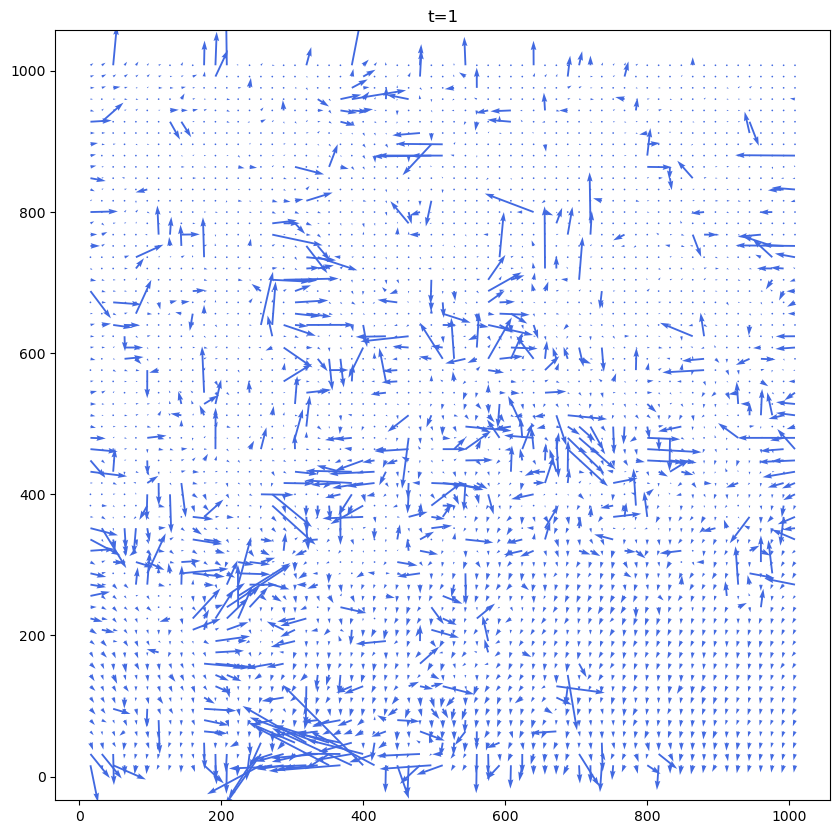

In [5]:
# fig = plt.figure(figsize = (10, 10))
# x = xgrid[0]
# y = ygrid[0]

# def make_frame(i):
#     plt.clf()

#     # Averaging
#     U_avg, V_avg, M_avg = vector_avg(U, V, M, i, 15)
#     # Postprocessing.
#     #U_post, V_post, _ = postprocess(U_avg, V_avg, M_avg, 3)
#     # Plotting.
#     plt.title("t="+str(i+t_start))
#     plt.imshow(slices[i].T)
#     plt.quiver(x, y, V_avg, -U_avg, color = "royalblue") # can use parameter scale to rescale the arrows.
#     #plt.gca().invert_yaxis()
#     #print("ha")

# myanim = FuncAnimation(fig, make_frame, frames = len(U)-1, interval = 500)
# myanim.save("avg_filter_backgr.mp4", writer="ffmpeg")

### Only vectors

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
1


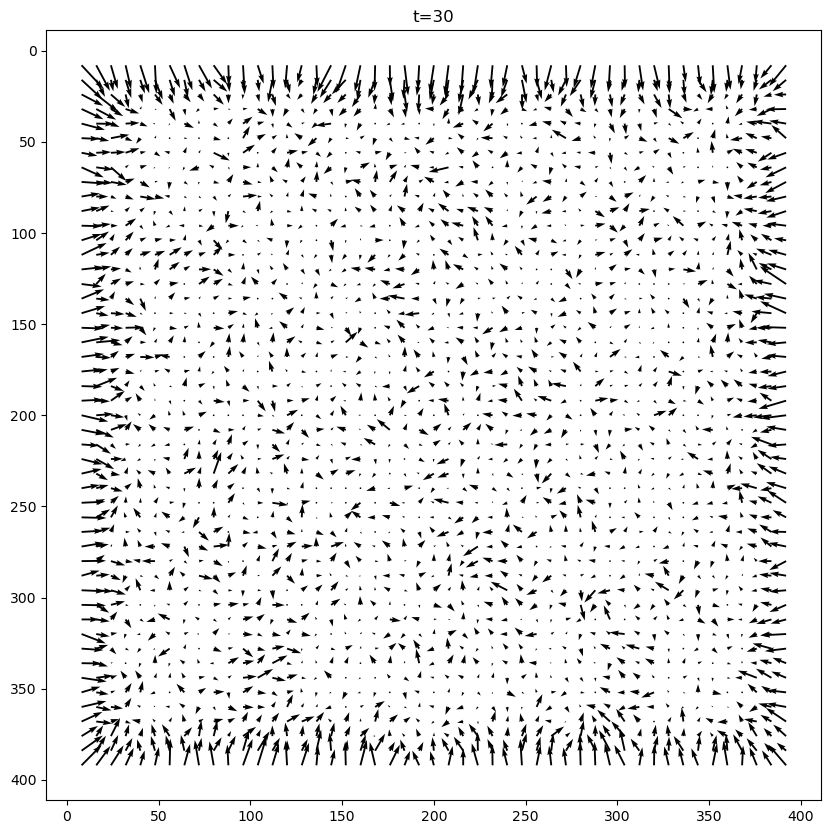

In [14]:
fig = plt.figure(figsize = (10, 10))
x = xgrid[0]
y = ygrid[0]
t_start = 30

def make_frame(i):
    plt.clf()

    # Averaging (after the space averaging)
    U_avg, V_avg, M_avg = vector_avg(U_agg, V_agg, M_agg, i, 15) # TODO: setthe boundary arrows to be 0.
    # Postprocessing.
    # U_post, V_post, _ = postprocess(U_avg, V_avg, M_avg, 2)
    # Plotting.
    plt.title("t="+str(i+t_start))
    plt.quiver(x, y, V_avg, -U_avg, color="black")
    plt.gca().invert_yaxis()

myanim = FuncAnimation(fig, make_frame, frames = len(U)-1, interval = 500)
myanim.save("avg_filter_backgr_only_vector.mp4", writer="ffmpeg")

## Write the U, V, M in h5 files.
Remember to synchronize the averaging interval as above. 

In [6]:
m_U = []
m_V = []
m_M = []

for i in range(len(U)):
    # Averaging
    U_avg, V_avg, M_avg = vector_avg(U, V, M, i, 15)
    # Postprocessing.
    U_post, V_post, M_post = postprocess(U_avg, V_avg, M_avg, 3)
    m_U.append(U_post)
    m_V.append(V_post)
    m_M.append(M_post)

# Write into h5 file.
U_avg = h5py.File("U_avg.h5", "w")
U_avg.create_dataset("matrix", data = m_U)
U_avg.close()

V_avg = h5py.File("V_avg.h5", "w")
V_avg.create_dataset("matrix", data = m_V)
V_avg.close()

M_avg = h5py.File("M_avg.h5", "w")
M_avg.create_dataset("matrix", data = m_M)
V_avg.close()

1
1
1
1
1
1
1
1
1
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
